In [1]:
import ROOT
import sys
import math
from ROOT import gStyle
from ROOT import gPad
#from ROOT import gSystem

inputfilepath = "$HOME/Lavoro/BDT_vertices_Valerio/"
outputfilepath = inputfilepath+"afterBDT_plots/"

# NORMALIZATION
nPOT_MC1 = 135000
nPOT_MC5 = 40000
nPOT_CH5R1 = 25593

vz_cut_CH5 = -73.64

# BDT_CUT
bdt_cut = 0.05;
ntrk_cut = 4;
nprim_cut = 8;

vz_cut_max = -5;
vz_cut_half_brick = -36.82; #-35;
vz_cut_full_brick = -73.64; #-70;


Welcome to JupyROOT 6.22/02


In [2]:
# BDT RESULTS

CH5_img1 = ROOT.TImage.Open("BDT_plots/CH5_input_var.png")
CH5_img2 = ROOT.TImage.Open("BDT_plots/CH5_coor_matrix_sig.png")
CH5_img3 = ROOT.TImage.Open("BDT_plots/CH5_coor_matrix_bkg.png")
CH5_img4 = ROOT.TImage.Open("BDT_plots/CH5_bdt_response.png")
CH5_img5 = ROOT.TImage.Open("BDT_plots/CH5_bdt_cut.png")
CH5_img6 = ROOT.TImage.Open("BDT_plots/CH5_roc.png")


RISULTATI BDT CH5


Error in <TASImage::Draw>: no image set
Error in <TASImage::Draw>: no image set
Error in <TASImage::Draw>: no image set
Error in <TASImage::Draw>: no image set
Error in <TASImage::Draw>: no image set
Error in <TASImage::Draw>: no image set


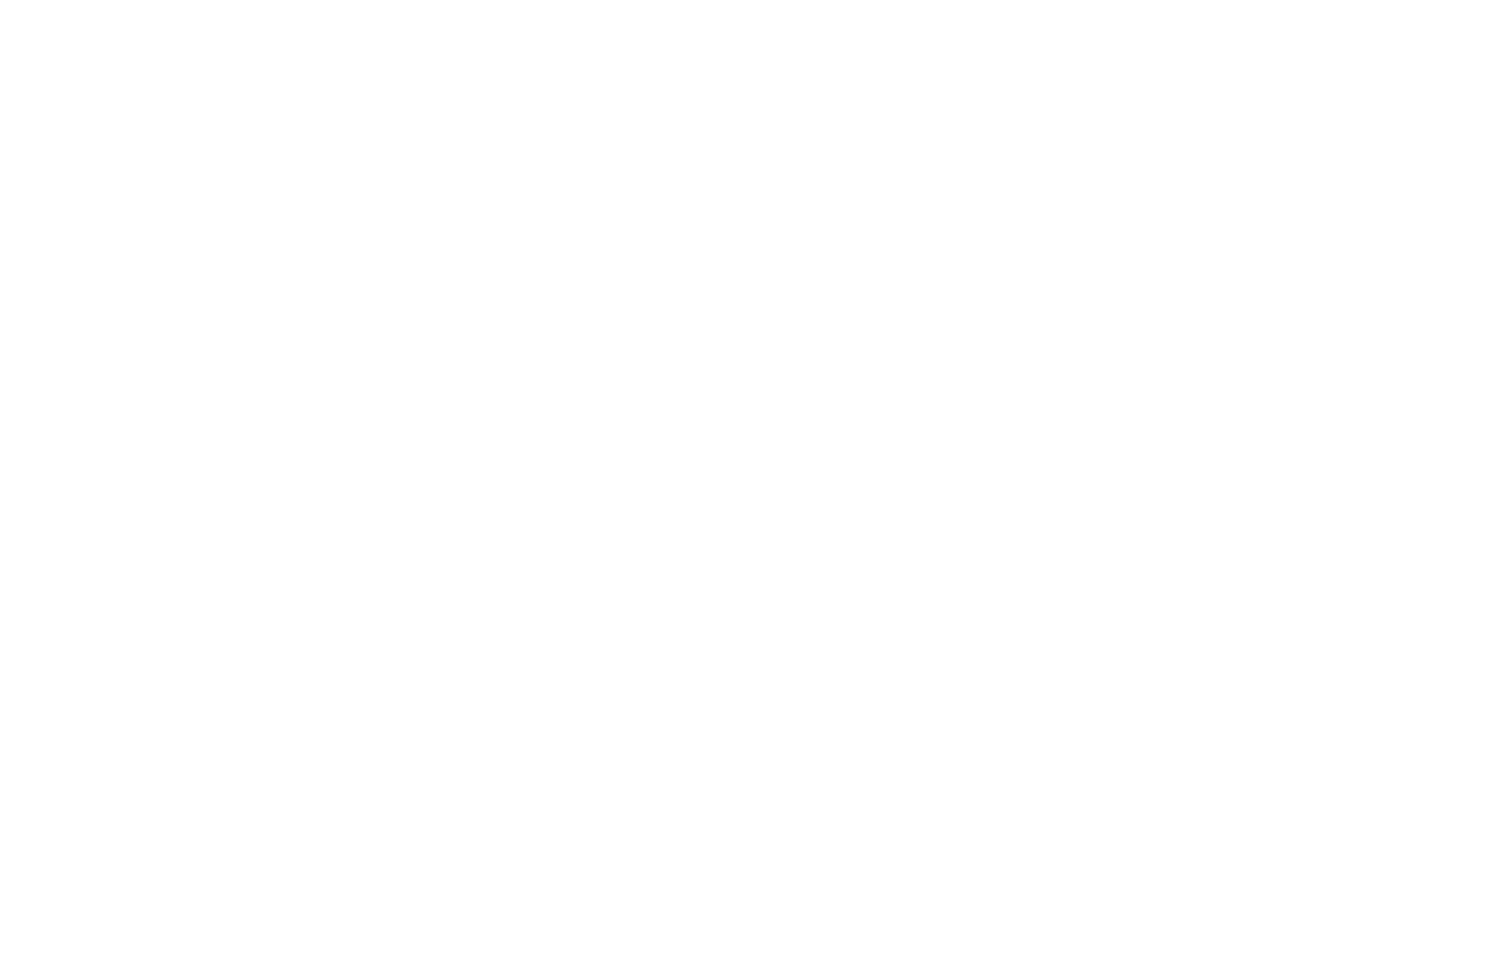

In [3]:
c0 = ROOT.TCanvas('c0','c0',1500,1000)
c0.Divide(3,2)
c0.cd(1)
CH5_img1.Draw()
c0.cd(2)
CH5_img2.Draw()
c0.cd(3)
CH5_img3.Draw()
c0.cd(4)
CH5_img4.Draw()
c0.cd(5)
CH5_img5.Draw()
c0.cd(6)
CH5_img6.Draw()
c0.Update()
print("RISULTATI BDT CH5")
c0.Draw()

In [4]:
print ("ANALISI CH5")

fMC5 = ROOT.TFile.Open(inputfilepath+"vtx_BDT_evaluated_MC_CH5.root")
hMC5_bdt= ROOT.TH1F('MC5_bdt','MC5_bdt',100,-1,1)
hMC5_bdt_tp= ROOT.TH1F('MC5_bdt_tp','MC5_bdt_tp',100,-1,1)
hMC5_bdt_pr= ROOT.TH1F('MC5_bdt_pr','MC5_bdt_pr',100,-1,1)
hMC5_bdt_hd= ROOT.TH1F('MC5_bdt_hd','MC5_bdt_hd',100,-1,1)
hMC5_bdt_var= ROOT.TH1F('MC5_bdt_var','MC5_bdt_var',100,0,0.5)
hMC5_bdt_var_tp= ROOT.TH1F('MC5_bdt_var_tp','MC5_bdt_var_tp',100,0,0.5)
hMC5_bdt_var_pr= ROOT.TH1F('MC5_bdt_var_pr','MC5_bdt_var_pr',100,0,0.5)
hMC5_bdt_var_hd= ROOT.TH1F('MC5_bdt_var_hd','MC5_bdt_var_hd',100,0,0.5)
hMC5_vz= ROOT.TH1F('MC5_vz','MC5_vz',30,-65,-5)
hMC5_vz_pr= ROOT.TH1F('MC5_vz_pr','MC5_vz_pr',30,-65,-5)
hMC5_vz_hd= ROOT.TH1F('MC5_vz_hd','MC5_vz_hd',30,-65,-5)
hMC5t_vz= ROOT.TH1F('MC5t_vz','MC5t_vz',30,-65,-5)
hMC5t_vz_pr= ROOT.TH1F('MC5t_vz_pr','MC5t_vz_pr',30,-65,-5)
hMC5t_vz_hd= ROOT.TH1F('MC5t_vz_hd','MC5t_vz_hd',30,-65,-5)
hMC5_n= ROOT.TH1F('MC5_n','MC5_n',35,0,70)
hMC5t_n= ROOT.TH1F('MC5t_n','MC5t_n',35,0,70)
hMC5t_n_pr= ROOT.TH1F('MC5t_n_pr','MC5t_n_pr',35,0,70)
hMC5t_n_hd= ROOT.TH1F('MC5t_n_hd','MC5t_n_hd',35,0,70)
hMC5n_vz= ROOT.TH1F('MC5n_vz','MC5n_vz',30,-65,-5)
hMC5n_n= ROOT.TH1F('MC5n_n','MC5n_n',35,0,70)

hMC5_nev = ROOT.TH1F('MC5_nev','MC5_nev',10,0,10)
hMC5_nel = ROOT.TH1F('MC5_nel','MC5_nel',20,0,20)
hMC5_maxf = ROOT.TH1F('MC5_maxf','MC5_maxf',40,0,40)
hMC5_meanf = ROOT.TH1F('MC5_meanf','MC5_meanf',20,0,1)
hMC5t_nev = ROOT.TH1F('MC5t_nev','MC5t_nev',10,0,10)
hMC5t_nel = ROOT.TH1F('MC5t_nel','MC5t_nel',20,0,20)
hMC5t_maxf = ROOT.TH1F('MC5t_maxf','MC5t_maxf',40,0,40)
hMC5t_meanf = ROOT.TH1F('MC5t_meanf','MC5t_meanf',20,0,1)
hMC5t_nev_pr = ROOT.TH1F('MC5t_nev_pr','MC5t_nev_pr',10,0,10)
hMC5t_nel_pr = ROOT.TH1F('MC5t_nel_pr','MC5t_nel_pr',20,0,20)
hMC5t_maxf_pr = ROOT.TH1F('MC5t_maxf_pr','MC5t_maxf_pr',40,0,40)
hMC5t_meanf_pr = ROOT.TH1F('MC5t_meanf_pr','MC5t_meanf_pr',20,0,1)
hMC5t_nev_hd = ROOT.TH1F('MC5t_nev_hd','MC5t_nev_hd',10,0,10)
hMC5t_nel_hd = ROOT.TH1F('MC5t_nel_hd','MC5t_nel_hd',20,0,20)
hMC5t_maxf_hd = ROOT.TH1F('MC5t_maxf_hd','MC5t_maxf_hd',40,0,40)
hMC5t_meanf_hd = ROOT.TH1F('MC5t_meanf_hd','MC5t_meanf_hd',20,0,1)
hMC5_nev_cut = ROOT.TH1F('MC5_nev_cut','MC5_nev_cut',10,0,10)
hMC5_nel_cut = ROOT.TH1F('MC5_nel_cut','MC5_nel_cut',20,0,20)
hMC5_maxf_cut = ROOT.TH1F('MC5_maxf_cut','MC5_maxf_cut',40,0,40)
hMC5_meanf_cut = ROOT.TH1F('MC5_meanf_cut','MC5_meanf_cut',20,0,1)
hMC5_nev_cut_pr = ROOT.TH1F('MC5_nev_cut_pr','MC5_nev_cut_pr',10,0,10)
hMC5_nel_cut_pr = ROOT.TH1F('MC5_nel_cut_pr','MC5_nel_cut_pr',20,0,20)
hMC5_maxf_cut_pr = ROOT.TH1F('MC5_maxf_cut_pr','MC5_maxf_cut_pr',40,0,40)
hMC5_meanf_cut_pr = ROOT.TH1F('MC5_meanf_cut_pr','MC5_meanf_cut_pr',20,0,1)
hMC5_nev_cut_hd = ROOT.TH1F('MC5_nev_cut_hd','MC5_nev_cut_hd',10,0,10)
hMC5_nel_cut_hd = ROOT.TH1F('MC5_nel_cut_hd','MC5_nel_cut_hd',20,0,20)
hMC5_maxf_cut_hd = ROOT.TH1F('MC5_maxf_cut_hd','MC5_maxf_cut_hd',40,0,40)
hMC5_meanf_cut_hd = ROOT.TH1F('MC5_meanf_cut_hd','MC5_meanf_cut_hd',20,0,1)
#
hMC5_vz_dl= ROOT.TH1F('MC5_vz_dl','MC5_vz_dl',180,0,360)
hMC5_vz_dl_pr= ROOT.TH1F('MC5_vz_dl_pr','MC5_vz_dl_pr',180,0,360)
hMC5_vz_dl_hd= ROOT.TH1F('MC5_vz_dl_hd','MC5_vz_dl_hd',180,0,360)
hMC5_vz_dl_fp= ROOT.TH1F('MC5_vz_dl_fp','MC5_vz_dl_fp',180,0,360)
#
hMC5t_tx= ROOT.TH1F('MC5t_tx','MC5t_tx',100,-1,1)
hMC5t_ty= ROOT.TH1F('MC5t_ty','MC5t_ty',100,-1,1)
hMC5t_the= ROOT.TH1F('MC5t_the','MC5t_the',500,0,0.5)
hMC5t_logthe= ROOT.TH1F('MC5t_logthe','MC5t_logthe',60,-6,0)
hMC5t_nseg= ROOT.TH1F('MC5t_nseg','MC5t_nseg',30,0,30)
hMC5f_tx= ROOT.TH1F('MC5f_tx','MC5f_tx',100,-1,1)
hMC5f_ty= ROOT.TH1F('MC5f_ty','MC5f_ty',100,-1,1)
hMC5f_the= ROOT.TH1F('MC5f_the','MC5f_the',500,0,0.5)
hMC5f_logthe= ROOT.TH1F('MC5f_logthe','MC5f_logthe',60,-6,0)
hMC5f_nseg= ROOT.TH1F('MC5f_nseg','MC5f_nseg',30,0,30)

ANALISI CH5


In [5]:
for ev in fMC5.bdt :
    if ev.ntracks>=ntrk_cut: 
        hMC5_bdt.Fill(ev.bdt_value)
        hMC5_bdt_var.Fill((1-ev.bdt_value)/ev.ntracks)
        hMC5_nev.Fill(ev.nevents);
        hMC5_nel.Fill(ev.nelectrons);
        hMC5_maxf.Fill(ev.maxfreq);
        hMC5_meanf.Fill(ev.meanfreq);
        # DA MODIFICARE IN TUTTE LE CONFIGURAZIONI CON TAGLIO NUOVO
        if (((ev.ntracks-ev.nelectrons)>=8 or (ev.mp_motherID==0 and ev.ntracks>=8)) and ev.maxfreq!=1 and 
            (ev.ntracks-ev.nevents+1)>=8 and ((ev.ntracks-ev.maxfreq)/ev.maxfreq<0.75 or ev.ntracks>10)):
            hMC5t_nel.Fill(ev.nelectrons);
            hMC5t_maxf.Fill(ev.maxfreq);
            hMC5t_meanf.Fill(ev.meanfreq);
            hMC5_bdt_tp.Fill(ev.bdt_value)
            hMC5_bdt_var_tp.Fill((1-ev.bdt_value)/ev.ntracks)
            if ev.mp_motherID==0: 
                hMC5_bdt_pr.Fill(ev.bdt_value)
                hMC5_bdt_var_pr.Fill((1-ev.bdt_value)/ev.ntracks)
                hMC5t_nev_pr.Fill(ev.nevents);
                hMC5t_nel_pr.Fill(ev.nelectrons);
                hMC5t_maxf_pr.Fill(ev.maxfreq);
                hMC5t_meanf_pr.Fill(ev.meanfreq);
            else:
                hMC5_bdt_hd.Fill(ev.bdt_value)
                hMC5_bdt_var_hd.Fill((1-ev.bdt_value)/ev.ntracks)
                hMC5t_nev_hd.Fill(ev.nevents);
                hMC5t_nel_hd.Fill(ev.nelectrons);
                hMC5t_maxf_hd.Fill(ev.maxfreq);
                hMC5t_meanf_hd.Fill(ev.meanfreq);
    if (1-ev.bdt_value)/ev.ntracks < bdt_cut and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH5: 
        hMC5_vz.Fill(ev.vz/1000.)
        if ev.mp_motherID==0:
            hMC5_vz_pr.Fill(ev.vz/1000.)
        else:
            hMC5_vz_hd.Fill(ev.vz/1000.)
        #hMC5_vz_dl.Fill(ev.vz/1000. + dz_CH5R1)
        hMC5_n.Fill(ev.ntracks)
        hMC5_nev_cut.Fill(ev.nevents);
        hMC5_nel_cut.Fill(ev.nelectrons);
        hMC5_maxf_cut.Fill(ev.maxfreq);
        hMC5_meanf_cut.Fill(ev.meanfreq);
        for i in range(ev.ntracks):
                hMC5t_tx.Fill(ev.t_eTX[i])
                hMC5t_ty.Fill(ev.t_eTY[i])
                hMC5t_nseg.Fill(ev.t_eNseg[i])
                theta = math.atan(ev.t_eTX[i]*ev.t_eTX[i]+ev.t_eTY[i]*ev.t_eTY[i])
                logthe = math.log10(theta)
                hMC5t_the.Fill(theta)
                hMC5t_logthe.Fill(logthe)  
        if (((ev.ntracks-ev.nelectrons)>=8 or (ev.mp_motherID==0 and ev.ntracks>=8)) and ev.maxfreq!=1 and 
            (ev.ntracks-ev.nevents+1)>=8 and ((ev.ntracks-ev.maxfreq)/ev.maxfreq<0.75 or ev.ntracks>10)):
            hMC5t_vz.Fill(ev.vz/1000.)
            hMC5t_n.Fill(ev.ntracks)       
            if ev.mp_motherID==0:
                hMC5t_vz_pr.Fill(ev.vz/1000.)
                #hMC5_vz_dl_pr.Fill(ev.vz/1000. + dz_CH5R1)
                hMC5t_n_pr.Fill(ev.ntracks)
                hMC5_nev_cut_pr.Fill(ev.nevents);
                hMC5_nel_cut_pr.Fill(ev.nelectrons);
                hMC5_maxf_cut_pr.Fill(ev.maxfreq);
                hMC5_meanf_cut_pr.Fill(ev.meanfreq);
            else: 
                hMC5t_vz_hd.Fill(ev.vz/1000.)
                #hMC5_vz_dl_hd.Fill(ev.vz/1000. + dz_CH5R1)
                hMC5t_n_hd.Fill(ev.ntracks)
                hMC5_nev_cut_hd.Fill(ev.nevents);
                hMC5_nel_cut_hd.Fill(ev.nelectrons);
                hMC5_maxf_cut_hd.Fill(ev.maxfreq);
                hMC5_meanf_cut_hd.Fill(ev.meanfreq);
        if not (((ev.ntracks-ev.nelectrons)>=8 or (ev.mp_motherID==0 and ev.ntracks>=8)) and ev.maxfreq!=1 and 
            (ev.ntracks-ev.nevents+1)>=8 and ((ev.ntracks-ev.maxfreq)/ev.maxfreq<0.75 or ev.ntracks>10)):
            hMC5n_vz.Fill(ev.vz/1000.)
            #hMC5_vz_dl_fp.Fill(ev.vz/1000. + dz_CH5R1)
            hMC5n_n.Fill(ev.ntracks)
    if (1-ev.bdt_value)/ev.ntracks > bdt_cut and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH5:
        for i in range(ev.ntracks):
                hMC5f_tx.Fill(ev.t_eTX[i])
                hMC5f_ty.Fill(ev.t_eTY[i])
                hMC5f_nseg.Fill(ev.t_eNseg[i])
                theta = math.atan(ev.t_eTX[i]*ev.t_eTX[i]+ev.t_eTY[i]*ev.t_eTY[i])
                logthe = math.log10(theta)
                hMC5f_the.Fill(theta)
                hMC5f_logthe.Fill(logthe) 

# to simulate the full run     
"""
hMC5_bdt.Scale(4)
hMC5_bdt_tp.Scale(4)
hMC5_bdt_pr.Scale(4)
hMC5_bdt_hd.Scale(4)
hMC5_bdt_var.Scale(4)
hMC5_bdt_var_tp.Scale(4)
hMC5_bdt_var_pr.Scale(4)
hMC5_bdt_var_hd.Scale(4)
hMC5_vz.Scale(4)
hMC5t_vz.Scale(4)
hMC5n_vz.Scale(4)
hMC5t_vz_pr.Scale(4)
hMC5t_vz_hd.Scale(4)
hMC5_n.Scale(4)
hMC5t_n.Scale(4)
hMC5n_n.Scale(4)
hMC5t_n_pr.Scale(4)
hMC5t_n_hd.Scale(4)

hMC5_vz_dl.Scale(4)
hMC5_vz_dl_pr.Scale(4)
hMC5_vz_dl_hd.Scale(4)
hMC5_vz_dl_fp.Scale(4)
"""
hMC5_vz_dl.SaveAs(outputfilepath+"MC5_vz_dl.root")
hMC5_vz_dl_pr.SaveAs(outputfilepath+"MC5_vz_dl_pr.root")
hMC5_vz_dl_hd.SaveAs(outputfilepath+"MC5_vz_dl_hd.root")
hMC5_vz_dl_fp.SaveAs(outputfilepath+"MC5_vz_dl_fp.root")

Error in <TFile::TFile>: file tmva_input_vertices.root does not exist


In [6]:
#PRINT       DA MODIFICARE TAGLIO NUOVO
CH5_nprotons = hMC5_nev_cut_pr.GetEntries()/hMC5_nev_cut.GetEntries()
CH5_nhadrons = hMC5_nev_cut_hd.GetEntries()/hMC5_nev_cut.GetEntries()
CH5_badsel = 1-CH5_nprotons-CH5_nhadrons
print("CH5_nprotons ",CH5_nprotons*100)
print("CH5_nhadrons ",CH5_nhadrons*100)
print("CH5_badsel ",CH5_badsel*100)

CH5_nprotons  40.93567251461988
CH5_nhadrons  58.77192982456141
CH5_badsel  0.29239766081871066


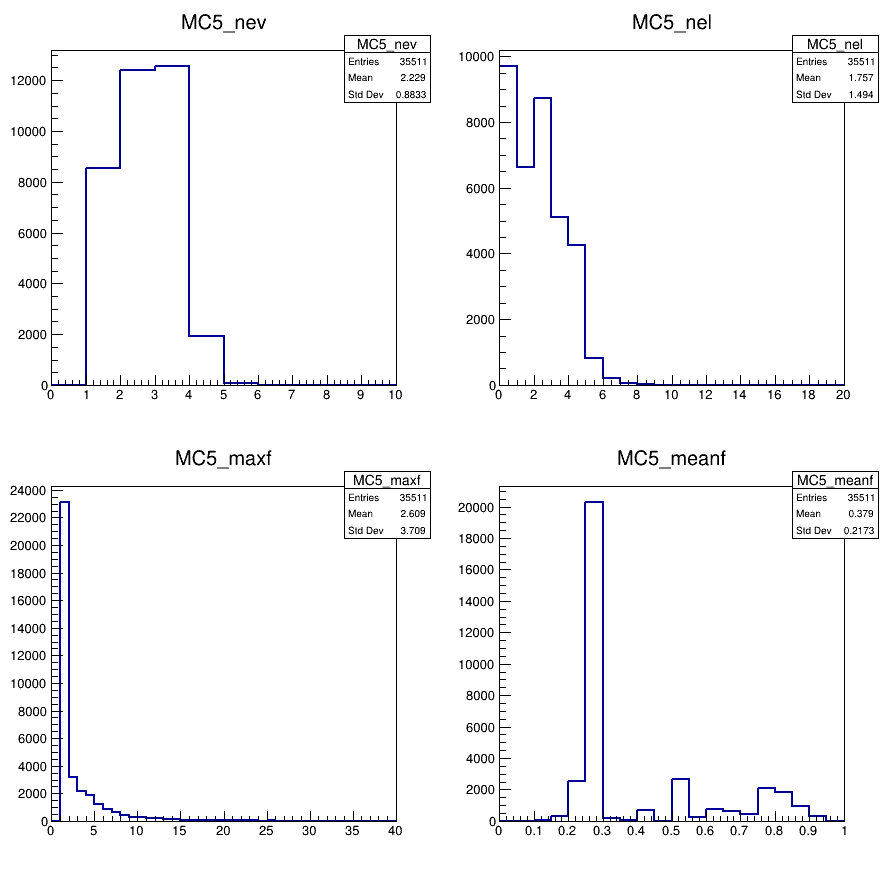

In [7]:
c0b = ROOT.TCanvas('c0b','c0b',900,900)
c0b.Divide(2,2)
c0b.cd(1)
hMC5_nev.Draw()
hMC5_nev.SetLineWidth(2)
c0b.cd(2)
hMC5_nel.Draw()
hMC5_nel.SetLineWidth(2)
c0b.cd(3)
hMC5_maxf.Draw()
hMC5_maxf.SetLineWidth(2)
c0b.cd(4)
hMC5_meanf.Draw()
hMC5_meanf.SetLineWidth(2)
c0b.Draw()

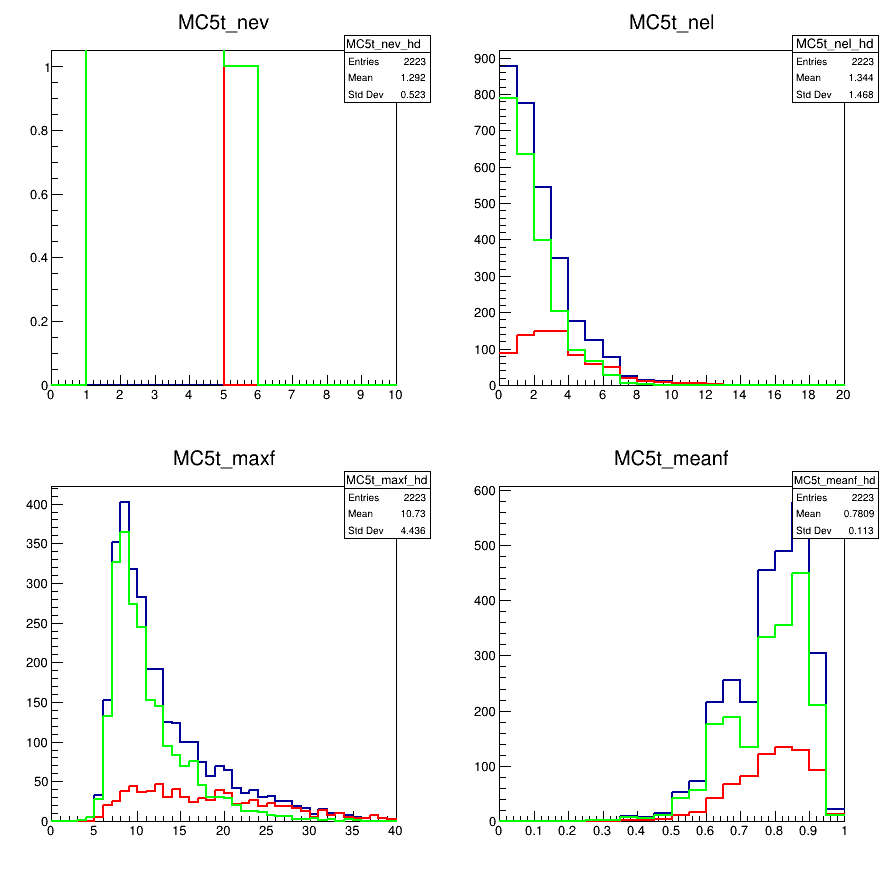

In [8]:
c0c = ROOT.TCanvas('c0c','c0c',900,900)
c0c.Divide(2,2)
c0c.cd(1)
hMC5t_nev.Draw()
hMC5t_nev.SetLineWidth(2)
hMC5t_nev_pr.Draw("sames")
hMC5t_nev_pr.SetLineWidth(2)
hMC5t_nev_pr.SetLineColor(2)
hMC5t_nev_hd.Draw("sames")
hMC5t_nev_hd.SetLineWidth(2)
hMC5t_nev_hd.SetLineColor(3)
c0c.cd(2)
hMC5t_nel.Draw()
hMC5t_nel.SetLineWidth(2)
hMC5t_nel_pr.Draw("sames")
hMC5t_nel_pr.SetLineWidth(2)
hMC5t_nel_pr.SetLineColor(2)
hMC5t_nel_hd.Draw("sames")
hMC5t_nel_hd.SetLineWidth(2)
hMC5t_nel_hd.SetLineColor(3)
c0c.cd(3)
hMC5t_maxf.Draw()
hMC5t_maxf.SetLineWidth(2)
hMC5t_maxf_pr.Draw("sames")
hMC5t_maxf_pr.SetLineWidth(2)
hMC5t_maxf_pr.SetLineColor(2)
hMC5t_maxf_hd.Draw("sames")
hMC5t_maxf_hd.SetLineWidth(2)
hMC5t_maxf_hd.SetLineColor(3)
c0c.cd(4)
hMC5t_meanf.Draw()
hMC5t_meanf.SetLineWidth(2)
hMC5t_meanf_pr.Draw("sames")
hMC5t_meanf_pr.SetLineWidth(2)
hMC5t_meanf_pr.SetLineColor(2)
hMC5t_meanf_hd.Draw("sames")
hMC5t_meanf_hd.SetLineWidth(2)
hMC5t_meanf_hd.SetLineColor(3)
c0c.Draw()

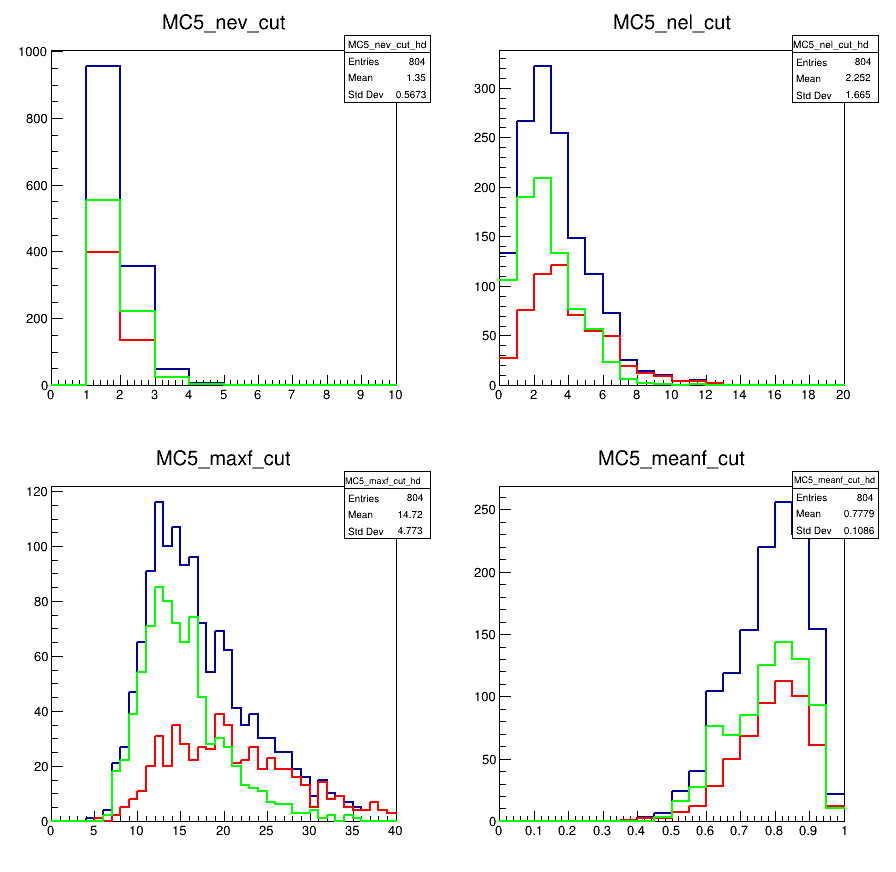

In [9]:
c0d = ROOT.TCanvas('c0d','c0d',900,900)
c0d.Divide(2,2)
c0d.cd(1)
hMC5_nev_cut.Draw()
hMC5_nev_cut.SetLineWidth(2)
hMC5_nev_cut_pr.Draw("sames")
hMC5_nev_cut_pr.SetLineWidth(2)
hMC5_nev_cut_pr.SetLineColor(2)
hMC5_nev_cut_hd.Draw("sames")
hMC5_nev_cut_hd.SetLineWidth(2)
hMC5_nev_cut_hd.SetLineColor(3)
c0d.cd(2)
hMC5_nel_cut.Draw()
hMC5_nel_cut.SetLineWidth(2)
hMC5_nel_cut_pr.Draw("sames")
hMC5_nel_cut_pr.SetLineWidth(2)
hMC5_nel_cut_pr.SetLineColor(2)
hMC5_nel_cut_hd.Draw("sames")
hMC5_nel_cut_hd.SetLineWidth(2)
hMC5_nel_cut_hd.SetLineColor(3)
c0d.cd(3)
hMC5_maxf_cut.Draw()
hMC5_maxf_cut.SetLineWidth(2)
hMC5_maxf_cut_pr.Draw("sames")
hMC5_maxf_cut_pr.SetLineWidth(2)
hMC5_maxf_cut_pr.SetLineColor(2)
hMC5_maxf_cut_hd.Draw("sames")
hMC5_maxf_cut_hd.SetLineWidth(2)
hMC5_maxf_cut_hd.SetLineColor(3)
c0d.cd(4)
hMC5_meanf_cut.Draw()
hMC5_meanf_cut.SetLineWidth(2)
hMC5_meanf_cut_pr.Draw("sames")
hMC5_meanf_cut_pr.SetLineWidth(2)
hMC5_meanf_cut_pr.SetLineColor(2)
hMC5_meanf_cut_hd.Draw("sames")
hMC5_meanf_cut_hd.SetLineWidth(2)
hMC5_meanf_cut_hd.SetLineColor(3)
c0d.Draw()

In [10]:
#ANALISI CH5R1
fDT1 = ROOT.TFile.Open(inputfilepath+"vtx_BDT_evaluated_DATA_CH5R1.root")
hDT1_bdt= ROOT.TH1F('DT1_bdt','DT1_bdt',100,-1,1)
hDT1_bdt_var= ROOT.TH1F('DT1_bdt_var','DT1_bdt_var',100,0,0.5)
hDT1_vz= ROOT.TH1F('DT1_vz','DT1_vz',30,-65,-5)
hDT1_vz_dl= ROOT.TH1F('DT1_vz_dl','DT1_vz_dl',180,0,360)
hDT1_n= ROOT.TH1F('DT1_n','DT1_n',35,0,70)

hDT1t_tx= ROOT.TH1F('DT1t_tx','DT1t_tx',100,-1,1)
hDT1t_ty= ROOT.TH1F('DT1t_ty','DT1t_ty',100,-1,1)
hDT1t_the= ROOT.TH1F('DT1t_the','DT1t_the',500,0,0.5)
hDT1t_logthe= ROOT.TH1F('DT1t_logthe','DT1t_logthe',60,-6,0)
hDT1t_nseg= ROOT.TH1F('DT1t_nseg','DT1t_nseg',30,0,30)

In [11]:
for ev in fDT1.bdt :
    if ev.ntracks>=ntrk_cut: 
        hDT1_bdt.Fill(ev.bdt_value)
        hDT1_bdt_var.Fill((1-ev.bdt_value)/ev.ntracks)
    #if ev.bdt_value>0.3 and ev.ntracks>10: 
    if (1-ev.bdt_value)/ev.ntracks <bdt_cut and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH5 :
        hDT1_vz.Fill(ev.vz/1000.)
        #hDT1_vz_dl.Fill(ev.vz/1000. + dz_CH5R1 + gap_CH5)
        hDT1_n.Fill(ev.ntracks)
        for i in range(ev.ntracks):
                hDT1t_tx.Fill(ev.t_eTX[i])
                hDT1t_ty.Fill(ev.t_eTY[i])
                hDT1t_nseg.Fill(ev.t_eNseg[i])
                theta = math.atan(ev.t_eTX[i]*ev.t_eTX[i]+ev.t_eTY[i]*ev.t_eTY[i])
                logthe = math.log10(theta)
                hDT1t_the.Fill(theta)
                hDT1t_logthe.Fill(logthe) 
        
hDT1_vz_dl.SaveAs(outputfilepath+"DT1_vz_dl.root")

Error in <TFile::TFile>: file tmva_input_vertices.root does not exist


In [12]:
scale_factor_1 = nPOT_MC5/nPOT_CH5R1
"""
print("Scale factor ",scale_factor_1)
hDT1_vz.Scale(scale_factor_1)
hDT1_n.Scale(scale_factor_1)
hDT1_bdt.Scale(scale_factor_1)
hDT1_bdt_var.Scale(scale_factor_1)
hDT1t_tx.Scale(scale_factor_1)
hDT1t_ty.Scale(scale_factor_1)
hDT1t_nseg.Scale(scale_factor_1)
hDT1t_the.Scale(scale_factor_1)
hDT1t_logthe.Scale(scale_factor_1) 
print(hDT1_vz.Integral())
print(hMC5_vz.Integral())
"""

'\nprint("Scale factor ",scale_factor_1)\nhDT1_vz.Scale(scale_factor_1)\nhDT1_n.Scale(scale_factor_1)\nhDT1_bdt.Scale(scale_factor_1)\nhDT1_bdt_var.Scale(scale_factor_1)\nhDT1t_tx.Scale(scale_factor_1)\nhDT1t_ty.Scale(scale_factor_1)\nhDT1t_nseg.Scale(scale_factor_1)\nhDT1t_the.Scale(scale_factor_1)\nhDT1t_logthe.Scale(scale_factor_1) \nprint(hDT1_vz.Integral())\nprint(hMC5_vz.Integral())\n'

BDT RESULT CH5


Info in <TCanvas::SaveAs>: ROOT file /home/utente/Lavoro/BDT_vertices_Valerio/afterBDT_plots/CH5_bdt.root has been created


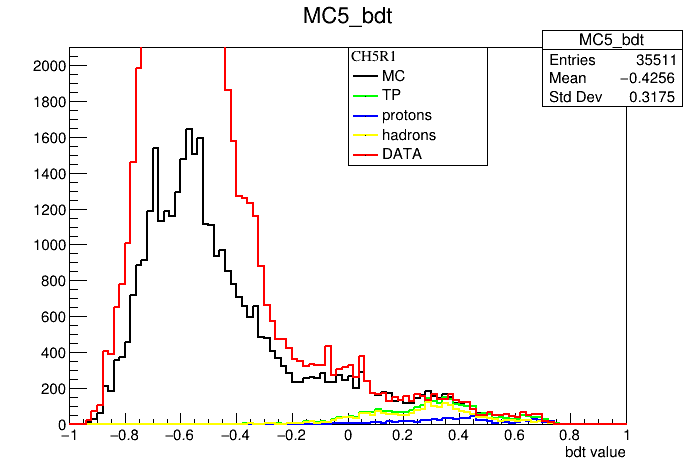

In [13]:
c1 = ROOT.TCanvas('c1','c1',180,10,700,500)
hMC5_bdt.Draw("hist")
hMC5_bdt.GetXaxis().SetTitle("bdt value")
hMC5_bdt.GetYaxis().SetRangeUser(0,2100)
hMC5_bdt.SetLineWidth(2)
hMC5_bdt.SetLineColor(1)
hMC5_bdt_tp.Draw("hist SAME")
hMC5_bdt_tp.SetLineWidth(2)
hMC5_bdt_tp.SetLineColor(3)
hMC5_bdt_pr.Draw("hist SAME")
hMC5_bdt_pr.SetLineWidth(2)
hMC5_bdt_pr.SetLineColor(4)
hMC5_bdt_hd.Draw("hist SAME")
hMC5_bdt_hd.SetLineWidth(2)
hMC5_bdt_hd.SetLineColor(5)
hDT1_bdt.Draw("SAME")
hDT1_bdt.SetLineWidth(2)
hDT1_bdt.SetLineColor(2)
leg1 = ROOT.TLegend(0.5,0.65,0.7,0.9);
leg1.AddEntry(hMC5_bdt,"MC","lp")
leg1.AddEntry(hMC5_bdt_tp,"TP","lp")
leg1.AddEntry(hMC5_bdt_pr,"protons","lp")
leg1.AddEntry(hMC5_bdt_hd,"hadrons","lp")
leg1.AddEntry(hDT1_bdt,"DATA","lp")
leg1.SetTextFont(132)
leg1.SetHeader("CH5R1")
leg1.SetTextFont(42)
leg1.Draw()
c1.Update()
print("BDT RESULT CH5")
c1.Draw()
c1.SaveAs(outputfilepath+"CH5_bdt.root")
#%jsroot on 


In [14]:
c2 = ROOT.TCanvas('c2','c2',180,10,700,500)
hMC5_bdt_var.Draw("hist")
hMC5_bdt_var.GetXaxis().SetTitle("(1-bdt value)/ntracks")
hMC5_bdt_var.GetYaxis().SetRangeUser(0,2500)
hMC5_bdt_var.SetLineWidth(2)
hMC5_bdt_var.SetLineColor(1)
hMC5_bdt_var_tp.Draw("hist SAME")
hMC5_bdt_var_tp.SetLineWidth(2)
hMC5_bdt_var_tp.SetLineColor(3)
hMC5_bdt_var_pr.Draw("hist SAME")
hMC5_bdt_var_pr.SetLineWidth(2)
hMC5_bdt_var_pr.SetLineColor(4)
hMC5_bdt_var_hd.Draw("hist SAME")
hMC5_bdt_var_hd.SetLineWidth(2)
hMC5_bdt_var_hd.SetLineColor(5)
hDT1_bdt_var.Draw("SAME")
hDT1_bdt_var.SetLineWidth(2)
hDT1_bdt_var.SetLineColor(2)
leg2 = ROOT.TLegend(0.3,0.65,0.5,0.9)
leg2.AddEntry(hMC5_bdt_var,"MC","lp")
leg2.AddEntry(hMC5_bdt_var_tp,"TP","lp")
leg2.AddEntry(hMC5_bdt_var_pr,"protons","lp")
leg2.AddEntry(hMC5_bdt_var_hd,"hadrons","lp")
leg2.AddEntry(hDT1_bdt_var,"DATA","lp")
leg2.SetTextFont(132)
leg2.SetHeader("CH5R1")
leg2.SetTextFont(42)
leg2.Draw()
c2.Update()
print("BDT VARIABLE CH5")
c2.Draw()
c2.SaveAs(outputfilepath+"CH5_bdt_var.root")
%jsroot on 

BDT VARIABLE CH5


Info in <TCanvas::SaveAs>: ROOT file /home/utente/Lavoro/BDT_vertices_Valerio/afterBDT_plots/CH5_bdt_var.root has been created


In [15]:
c3b = ROOT.TCanvas('c3b','c3b',180,10,700,500)
hMC5t_vz_pr.Draw("hist")
hMC5t_vz_pr.GetYaxis().SetRangeUser(0,1000)
hMC5t_vz_pr.GetXaxis().SetTitle("vz [mm]")
hMC5t_vz_pr.GetXaxis().SetTitleOffset(1.2)
hMC5t_vz_pr.SetLineWidth(2)
hMC5t_vz_hd.Draw("hist SAME")
hMC5t_vz_hd.SetLineWidth(2)
hMC5t_vz_hd.SetLineColor(2)
hMC5t_vz_pr.SetTitle("protons")
hMC5t_vz_hd.SetTitle("hadrons")
leg3b = ROOT.TLegend(0.5,0.4,0.3,0.6);
leg3b.AddEntry(hMC5t_vz_pr,"protons","lp")
leg3b.AddEntry(hMC5t_vz_hd,"hadrons","lp")
leg3b.SetTextFont(132)
leg3b.SetHeader("CH5R1")
leg3b.SetTextFont(42)
leg3b.Draw()
#c1.BuildLegend()
c3b.Update()
c3b.Draw()
#jsroot on 

In [16]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC5_vz.Draw("hist")
hMC5_vz.GetYaxis().SetRangeUser(0,1800)
hMC5_vz.GetXaxis().SetTitle("vz [mm]")
hMC5_vz.GetXaxis().SetTitleOffset(1.2)
hMC5_vz.SetLineWidth(2)
"""
hMC5t_vz.SetLineWidth(2)
hMC5t_vz.SetLineColor(3)
hMC5t_vz.Draw("hist SAME")
hMC5n_vz.SetLineWidth(2)
hMC5n_vz.SetLineColor(1)
hMC5n_vz.Draw("hist SAME")
"""
hDT1_vz.SetLineWidth(2)
hDT1_vz.SetLineColor(2)
hDT1_vz.Draw("SAME")
hMC5_vz.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC5t_vz.SetTitle("TP")
hDT1_vz.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC5_vz,"MC","lp")
#leg3.AddEntry(hMC5t_vz,"TP","lp")
#leg3.AddEntry(hMC5n_vz,"FP","lp")
leg3.AddEntry(hDT1_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH5R1")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
c3.SaveAs(outputfilepath+"CH5_vz_mc_data_R1.root")
#%jsroot on 
#hDT1_vz.SetName("vz_ch5")
#hDT1_vz.SaveAs("full_vz_CH5.root")

Info in <TCanvas::SaveAs>: ROOT file /home/utente/Lavoro/BDT_vertices_Valerio/afterBDT_plots/CH5_vz_mc_data_R1.root has been created


In [17]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC5t_n_pr.Draw("hist")
hMC5t_n_pr.GetYaxis().SetRangeUser(0,1180)
hMC5t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC5t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC5t_n_pr.SetLineWidth(2)
hMC5t_n_hd.Draw("hist SAME")
hMC5t_n_hd.SetLineWidth(2)
hMC5t_n_hd.SetLineColor(2)
hMC5t_n_pr.SetTitle("protons")
hMC5t_n_hd.SetTitle("hadrons")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC5t_n_pr,"protons","lp")
leg4b.AddEntry(hMC5t_n_hd,"hadrons","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH5R1")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
#%jsroot on 

In [18]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC5t_n_pr.Draw("hist")
hMC5t_n_pr.GetYaxis().SetRangeUser(0,1400)
hMC5t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC5t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC5t_n_pr.SetLineWidth(2)
hMC5t_n_hd.Draw("hist SAME")
hMC5t_n_hd.SetLineWidth(2)
hMC5t_n_hd.SetLineColor(2)
hMC5t_n_pr.SetTitle("protons")
hMC5t_n_hd.SetTitle("hadrons")
hDT1_n.SetLineWidth(3)
hDT1_n.SetLineColor(1)
hDT1_n.Draw("SAME")
hMC5t_n.SetLineWidth(2)
hMC5t_n.SetLineColor(3)
hMC5t_n.Draw("hist SAME")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC5t_n,"all vertices","lp")
leg4b.AddEntry(hMC5t_n_pr,"protons","lp")
leg4b.AddEntry(hMC5t_n_hd,"hadrons","lp")
leg4b.AddEntry(hDT1_n,"DATA","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH5R1")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
c4b.SaveAs(outputfilepath+"CH5_mult.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b
Info in <TCanvas::SaveAs>: ROOT file /home/utente/Lavoro/BDT_vertices_Valerio/afterBDT_plots/CH5_mult.root has been created


In [19]:
c4 = ROOT.TCanvas('c2','Example',180,10,700,500)
hMC5_n.Draw("hist")
hMC5_n.GetXaxis().SetTitle("multiplicity")
hMC5_n.GetXaxis().SetTitleOffset(1.2)
hMC5_n.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC5_n.GetYaxis().SetRangeUser(0,1800)
hMC5_n.SetLineWidth(2)
"""
hMC5t_n.SetLineWidth(2)
hMC5t_n.SetLineColor(3)
hMC5t_n.Draw("hist SAME")
hMC5n_n.SetLineWidth(2)
hMC5n_n.SetLineColor(1)
hMC5n_n.Draw("hist SAME")
"""
hDT1_n.SetLineWidth(2)
hDT1_n.SetLineColor(2)
hDT1_n.Draw("SAME")
#hMC_n.SetTitle("MC")
hMC5t_n.SetTitle("TP")
hDT1_n.SetTitle("DATA")
leg4 = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg4.AddEntry(hMC5_n,"MC","lp")
#leg4.AddEntry(hMC5t_n,"TP","lp")
#leg4.AddEntry(hMC5n_n,"FP","lp")
leg4.AddEntry(hDT1_n,"DATA","lp")
leg4.SetTextFont(132)
leg4.SetHeader("CH5R1")
leg4.SetTextFont(42)
leg4.Draw()
#c2.BuildLegend()
c4.Update()
c4.Draw() 
c4.SaveAs(outputfilepath+"mult_mc_data.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file /home/utente/Lavoro/BDT_vertices_Valerio/afterBDT_plots/mult_mc_data.root has been created


In [20]:
hDT1t_tx.Scale(hMC5t_tx.Integral()/hDT1t_tx.Integral())
hDT1t_ty.Scale(hMC5t_ty.Integral()/hDT1t_ty.Integral())
hDT1t_the.Scale(hMC5t_the.Integral()/hDT1t_the.Integral())
hDT1t_logthe.Scale(hMC5t_logthe.Integral()/hDT1t_logthe.Integral())

In [21]:
c5 = ROOT.TCanvas('c5','Example',900,900)
c5.Divide(2,2)
c5.cd(1)
hMC5t_tx.Draw("hist")
#hDT1t_tx.Draw("hist sames")
hDT1t_tx.Draw("sames")
hMC5t_tx.GetXaxis().SetTitle("TX")
hMC5t_tx.GetXaxis().SetTitleOffset(1.2)
hMC5t_tx.GetYaxis().SetRangeUser(0,11800)
hMC5t_tx.SetLineWidth(2)
hMC5t_tx.SetLineColor(2)
hMC5t_tx.SetFillColor(2)
#hDT1t_tx.SetFillColor(3)
#hDT1t_tx.SetLineColor(3)
#hDT1t_tx.SetLineWidth(2)
hDT1t_tx.SetLineColor(1)
hDT1t_tx.SetLineWidth(2)
leg5a = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5a.AddEntry(hMC5t_tx,"MC","lp")
leg5a.AddEntry(hDT1t_tx,"DATA","lp")
leg5a.SetTextFont(132)
leg5a.SetHeader("CH5R1")
leg5a.SetTextFont(42)
leg5a.Draw()
c5.cd(2)
hMC5t_ty.Draw("hist")
hDT1t_ty.Draw("sames")
hMC5t_ty.GetXaxis().SetTitle("TY")
hMC5t_ty.GetXaxis().SetTitleOffset(1.2)
hMC5t_ty.GetYaxis().SetRangeUser(0,11800)
hMC5t_ty.SetLineWidth(2)
hMC5t_ty.SetLineColor(2)
hMC5t_ty.SetFillColor(2)
#hDT1t_ty.SetFillColor(3)
hDT1t_ty.SetLineColor(1)
hDT1t_ty.SetLineWidth(2)
leg5b = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5b.AddEntry(hMC5t_ty,"MC","lp")
leg5b.AddEntry(hDT1t_ty,"DATA","lp")
leg5b.SetTextFont(132)
leg5b.SetHeader("CH5R1")
leg5b.SetTextFont(42)
leg5b.Draw()
c5.cd(3).SetLogy()
hMC5t_the.Draw("hist")
hDT1t_the.Draw("sames")
hMC5t_the.GetXaxis().SetTitle("#theta [rad]")
hMC5t_the.GetXaxis().SetTitleOffset(1.2)
hMC5t_the.GetYaxis().SetRangeUser(0,hDT1t_the.GetMaximum()*1.2)
hMC5t_the.SetLineWidth(2)
hMC5t_the.SetLineColor(2)
hMC5t_the.SetFillColor(2)
#hDT1t_the.SetFillColor(3)
hDT1t_the.SetLineColor(1)
hDT1t_the.SetLineWidth(2)
leg5c = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5c.AddEntry(hMC5t_the,"MC","lp")
leg5c.AddEntry(hDT1t_the,"DATA","lp")
leg5c.SetTextFont(132)
leg5c.SetHeader("CH5R1")
leg5c.SetTextFont(42)
leg5c.Draw()
c5.Update()
c5.cd(4)
hMC5t_logthe.Draw("hist")
hDT1t_logthe.Draw("sames")
hMC5t_logthe.GetXaxis().SetTitle("#theta [rad]")
hMC5t_logthe.GetXaxis().SetTitleOffset(1.2)
hMC5t_logthe.GetYaxis().SetRangeUser(0,3600)
hMC5t_logthe.SetLineWidth(2)
hMC5t_logthe.SetLineColor(2)
hMC5t_logthe.SetFillColor(2)
#hDT1t_logthe.SetFillColor(3)
hDT1t_logthe.SetLineColor(1)
hDT1t_logthe.SetLineWidth(2)
leg5d = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5d.AddEntry(hMC5t_logthe,"MC","lp")
leg5d.AddEntry(hDT1t_logthe,"DATA","lp")
leg5d.SetTextFont(132)
leg5d.SetHeader("CH5R1")
leg5d.SetTextFont(42)
leg5d.Draw()
c5.Update()
c5.Draw() 
c5.SaveAs(outputfilepath+"CH5_ang.root")
#%jsroot on 

Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Info in <TCanvas::SaveAs>: ROOT file /home/utente/Lavoro/BDT_vertices_Valerio/afterBDT_plots/CH5_ang.root has been created


In [22]:
print("It looks nice!!!")

It looks nice!!!


In [23]:
pot5_MC = nPOT_MC1/nPOT_MC5
#nRUNS = 6
nSCAN = 1
print("final scaling ", pot5_MC/nSCAN)

final scaling  3.375


In [24]:
# Analisi globale
hMC_vz_full= ROOT.TH1F('MC_vz','MC_vz_full',30,-65,-5)
hMC_n_full= ROOT.TH1F('MC_n_full','MC_n_full',35,0,70)
hMC_vz_pr_full= ROOT.TH1F('MC_vz_pr_full','MC_vz_pr_full',15,-35,-5)
hMC_vz_hd_full= ROOT.TH1F('MC_vz_hd_full','MC_vz_hd_full',15,-35,-5)

hDT_vz_full= ROOT.TH1F('DT_vz','DT_vz_full',30,-65,-5)
hDT_n_full= ROOT.TH1F('DT_n_full','DT_n_full',35,0,70)

hDT1_vz_eff_corr= ROOT.TH1F('DT1_vz_eff_corr','DT1_vz_eff_corr',30,-65,-5)
hDT1_n_eff_corr= ROOT.TH1F('DT1_n_eff_corr','DT1_n_eff_corr',35,0,70)
"""
hDT2_vz_eff_corr= ROOT.TH1F('DT2_vz_eff_corr','DT2_vz_eff_corr',30,-65,-5)
hDT2_n_eff_corr= ROOT.TH1F('DT2_n_eff_corr','DT2_n_eff_corr',35,0,70)
hDT3_vz_eff_corr= ROOT.TH1F('DT3_vz_eff_corr','DT3_vz_eff_corr',30,-65,-5)
hDT3_n_eff_corr= ROOT.TH1F('DT3_n_eff_corr','DT3_n_eff_corr',35,0,70)
hDT4_vz_eff_corr= ROOT.TH1F('DT4_vz_eff_corr','DT4_vz_eff_corr',30,-65,-5)
hDT4_n_eff_corr= ROOT.TH1F('DT4_n_eff_corr','DT4_n_eff_corr',35,0,70)
hDT5_vz_eff_corr= ROOT.TH1F('DT5_vz_eff_corr','DT5_vz_eff_corr',30,-65,-5)
hDT5_n_eff_corr= ROOT.TH1F('DT5_n_eff_corr','DT5_n_eff_corr',35,0,70)
"""

"""
eff2_corr = 1/eff2
eff3_corr = 1/eff3
eff4_corr = 1/eff4
eff5_corr = 1/eff5
"""

# scale factor and efficiency correction
hDT1_vz.Scale(scale_factor_1)
eff1 = hDT1_vz.Integral()/hMC5_vz.Integral()
print(eff1)
eff1_corr = 1/eff1

hDT1_vz_eff_corr.Add(hDT1_vz)
hDT1_vz_eff_corr.Scale(eff1_corr)
"""
hDT2_vz_eff_corr.Add(hDT2_vz)
hDT2_vz_eff_corr.Scale(eff2_corr)
hDT3_vz_eff_corr.Add(hDT3_vz)
hDT3_vz_eff_corr.Scale(eff3_corr)
hDT4_vz_eff_corr.Add(hDT4_vz)
hDT4_vz_eff_corr.Scale(eff4_corr)
hDT5_vz_eff_corr.Add(hDT5_vz)
hDT5_vz_eff_corr.Scale(eff5_corr)
"""
hDT1_n_eff_corr.Add(hDT1_n)
hDT1_n_eff_corr.Scale(eff1_corr)
"""
hDT2_n_eff_corr.Add(hDT2_n)
hDT2_n_eff_corr.Scale(eff2_corr)
hDT3_n_eff_corr.Add(hDT3_n)
hDT3_n_eff_corr.Scale(eff3_corr)
hDT4_n_eff_corr.Add(hDT4_n)
hDT4_n_eff_corr.Scale(eff4_corr)
hDT5_n_eff_corr.Add(hDT5_n)
hDT5_n_eff_corr.Scale(eff5_corr)
"""

# SCALE EFFICIENCY PROTON HADRON
eff_proton = hMC5_bdt_var_pr.Integral(0,10)/hMC5_bdt_var_pr.Integral(0,100)
eff_hadron = hMC5_bdt_var_hd.Integral(0,10)/hMC5_bdt_var_hd.Integral(0,100)

print("eff_proton",eff_proton," , eff_hadron",eff_hadron)

#RISCALA PER IL NUMERO DI RUN CONSIDERATI
hMC_vz_full.Add(hMC5_vz)
#hMC_vz_full.Scale(4)
hMC_n_full.Add(hMC5_n)
#hMC_n_full.Scale(4)
hMC_vz_pr_full.Add(hMC5_vz_pr)
#hMC_vz_pr_full.Scale(3) 
hMC_vz_hd_full.Add(hMC5_vz_hd)
#hMC_vz_hd_full.Scale(3)

hDT_vz_full.Add(hDT1_vz_eff_corr)
"""
hDT_vz_full.Add(hDT2_vz_eff_corr)
hDT_vz_full.Add(hDT3_vz_eff_corr)
hDT_vz_full.Add(hDT4_vz_eff_corr)
hDT_vz_full.Add(hDT5_vz_eff_corr)
"""

hDT_n_full.Add(hDT1_n_eff_corr)
"""
hDT_n_full.Add(hDT2_n_eff_corr)
hDT_n_full.Add(hDT3_n_eff_corr)
hDT_n_full.Add(hDT4_n_eff_corr)
hDT_n_full.Add(hDT5_n_eff_corr)
"""

2.033386970249839
eff_proton 0.741424802110818  , eff_hadron 0.36707152496626183


'\nhDT_n_full.Add(hDT2_n_eff_corr)\nhDT_n_full.Add(hDT3_n_eff_corr)\nhDT_n_full.Add(hDT4_n_eff_corr)\nhDT_n_full.Add(hDT5_n_eff_corr)\n'

Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge


In [25]:
c5 = ROOT.TCanvas('c5','Example',180,10,700,500)
hMC_vz_full.Draw("hist")
hMC_vz_full.GetXaxis().SetTitle("vz [mm]")
hMC_vz_full.GetXaxis().SetTitleOffset(1.2)
#hMC_vz_full.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC_vz_full.GetYaxis().SetRangeUser(0,1000)
hMC_vz_full.SetLineWidth(2)
#
hDT_vz_full.SetLineWidth(2)
hDT_vz_full.SetLineColor(2)
hDT_vz_full.Draw("SAME")
hDT_vz_full.SetTitle("DATA")

hMC_vz_pr_full.SetLineWidth(2)
hMC_vz_pr_full.SetLineColor(3)
hMC_vz_pr_full.Draw("SAME")
hMC_vz_pr_full.SetTitle("protons")

hMC_vz_hd_full.SetLineWidth(2)
hMC_vz_hd_full.SetLineColor(4)
hMC_vz_hd_full.Draw("SAME")
hMC_vz_hd_full.SetTitle("protons")

leg5 = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5.AddEntry(hMC_vz_full,"MC","lp")
leg5.AddEntry(hDT_vz_full,"DATA","lp")
leg5.SetTextFont(132)
leg5.SetHeader("CH5_FULL")
leg5.SetTextFont(42)
leg5.Draw()
#c2.BuildLegend()
c5.Update()
c5.Draw() 
#c5.SaveAs("mult_mc_data.root")
#%jsroot on 
hDT_vz_full.SetName("vz_ch5")
hDT_vz_full.SaveAs(outputfilepath+"full_vz_CH5.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


In [26]:
hDT_vz_full.SaveAs(outputfilepath+"with_bkg_full_vz_CH5.root")
hDT_vz_full.Add(hMC_vz_hd_full,-1)
hDT_vz_full.SaveAs(outputfilepath+"full_vz_CH5.root")
hMC_vz_pr_full.SetName("vz_ch5_pr")
hMC_vz_pr_full.SaveAs(outputfilepath+"full_vz_CH5_MC_pr.root")
hMC_vz_hd_full.SetName("vz_ch5_hd")
hMC_vz_hd_full.SaveAs(outputfilepath+"full_vz_CH5_MC_hd.root")

In [27]:
#ERRORI
hDT1_vz.Rebin(3)
#hDT2_vz.Rebin(3)
#hDT3_vz.Rebin(3)
#hDT4_vz.Rebin(3)
#hDT5_vz.Rebin(3)
#hDT6_vz.Rebin(3)
#Ntot = hDT1_vz.GetEntries()+hDT2_vz.GetEntries()+hDT3_vz.GetEntries()+hDT4_vz.GetEntries()+hDT5_vz.GetEntries()
#+hDT6_vz.GetEntries()+


N11 = hDT1_vz.GetBinContent(1)
N12 = hDT1_vz.GetBinContent(2)
N13 = hDT1_vz.GetBinContent(3)
N14 = hDT1_vz.GetBinContent(4)
N15 = hDT1_vz.GetBinContent(5)
N16 = hDT1_vz.GetBinContent(6)
N17 = hDT1_vz.GetBinContent(7)
N18 = hDT1_vz.GetBinContent(8)
N19 = hDT1_vz.GetBinContent(9)
N110 = hDT1_vz.GetBinContent(10)

"""
N21 = hDT2_vz.GetBinContent(1)
N22 = hDT2_vz.GetBinContent(2)
N23 = hDT2_vz.GetBinContent(3)
N24 = hDT2_vz.GetBinContent(4)
N25 = hDT2_vz.GetBinContent(5)

N31 = hDT3_vz.GetBinContent(1)
N32 = hDT3_vz.GetBinContent(2)
N33 = hDT3_vz.GetBinContent(3)
N34 = hDT3_vz.GetBinContent(4)
N35 = hDT3_vz.GetBinContent(5)

N41 = hDT4_vz.GetBinContent(1)
N42 = hDT4_vz.GetBinContent(2)
N43 = hDT4_vz.GetBinContent(3)
N44 = hDT4_vz.GetBinContent(4)
N45 = hDT4_vz.GetBinContent(5)

N51 = hDT5_vz.GetBinContent(1)
N52 = hDT5_vz.GetBinContent(2)
N53 = hDT5_vz.GetBinContent(3)
N54 = hDT5_vz.GetBinContent(4)
N55 = hDT5_vz.GetBinContent(5)

N61 = hDT6_vz.GetBinContent(1)
N62 = hDT6_vz.GetBinContent(2)
N63 = hDT6_vz.GetBinContent(3)
N64 = hDT6_vz.GetBinContent(4)
N65 = hDT6_vz.GetBinContent(5)
"""

#N1tot = N11 + N21 + N31  + N41 + N51 + N61
#N2tot = N12 + N22 + N32  + N42 + N52 + N62
#N3tot = N13 + N23 + N33  + N43 + N53 + N63
#N4tot = N14 + N24 + N34  + N44 + N54 + N64
#N5tot = N15 + N25 + N35  + N45 + N55 + N65"
N1tot = N11
N2tot = N12 
N3tot = N13  
N4tot = N14 
N5tot = N15  
N6tot = N16
N7tot = N17 
N8tot = N18  
N9tot = N19 
N10tot = N110 

C = pot5_MC/nSCAN

#E1 = (C/N1tot) * ( N11 * eff1_corr + N21 * eff2 + N31 * eff3 + N41 * eff4 + N51 * eff5 
#                  + N61 * eff6)

#E2 = (C/N2tot) * ( N12 * eff1_corr + N22 * eff2 + N32 * eff3 + N42 * eff4 + N52 * eff5 
#                  + N62 * eff6)

#E3 = (C/N3tot) * ( N13 * eff1_corr + N23 * eff2 + N33 * eff3 + N43 * eff4 + N53 * eff5 
#                  + N63 * eff6)

#E4 = (C/N4tot) * ( N14 * eff1_corr + N24 * eff2 + N34 * eff3 + N44 * eff4 + N54 * eff5 
#                  + N64 * eff6)

#E5 = (C/N5tot) * ( N15 * eff1_corr + N25 * eff2 + N35 * eff3 + N45 * eff4 + N55 * eff5 
#                  + N65 * eff6)

E1 = (C/N1tot) * ( N11 * eff1_corr )

E2 = (C/N2tot) * ( N12 * eff1_corr )

E3 = (C/N3tot) * ( N13 * eff1_corr )

E4 = (C/N4tot) * ( N14 * eff1_corr )

E5 = (C/N5tot) * ( N15 * eff1_corr )

E6 = (C/N6tot) * ( N16 * eff1_corr )

E7 = (C/N7tot) * ( N17 * eff1_corr )

E8 = (C/N8tot) * ( N18 * eff1_corr )

E9 = (C/N9tot) * ( N19 * eff1_corr )

E10 = (C/N10tot) * ( N110 * eff1_corr )

In [28]:
print("errors ", E1*math.sqrt(N1tot)," ",E2*math.sqrt(N2tot)," ",E3*math.sqrt(N3tot)," ",E4*math.sqrt(N4tot)," ",E5*math.sqrt(N5tot)," ",
      E6*math.sqrt(N6tot)," ",E7*math.sqrt(N7tot)," ",E8*math.sqrt(N8tot)," ",E9*math.sqrt(N9tot)," ",E10*math.sqrt(N10tot))

errors  23.930344920385792   22.05780852408098   27.371447839831944   24.72676543776522   24.287533967724205   27.371447839831944   30.354985407604296   26.165058541993172   24.46417289314557   26.08264871422665
